In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px

In [26]:
biometrics_df = df = pd.read_csv('../bio_data/biometrics_data.csv', delimiter=';').reset_index().rename(columns={'index':'detection_id'})

# Somehow the steps_length column is a string of a list of floats, so we need to convert it to a list of floats
biometrics_df["steps_length"] = biometrics_df["steps_length"].apply(
    lambda x: np.fromstring(x[1:-1], sep=" ")
)

# Rename side by side video
biometrics_df.loc[(biometrics_df['video_id'] == 'drunk_woman') & (biometrics_df['person_id'] == 1), 'camera_type'] = 'side'
biometrics_df.loc[(biometrics_df['video_id'] == 'drunk_woman') & (biometrics_df['person_id'] == 2), 'camera_type'] = 'front'

# Remove outlier
biometrics_df = biometrics_df[ (biometrics_df['video_id'] != 'DTU1') & (biometrics_df['asymmetry'] > -10.0)]

# Rename labels
replace = {"side2": "side", "front_multiple": "front", "back": "front", 'frontback': 'front'}
biometrics_df["camera_type"].replace(replace, inplace=True)

C:\Users\balda\AppData\Local\Temp\ipykernel_23068\788428997.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
clustering_df = biometrics_df[['detection_id','camera_type','walking_type','avg_step_length','speed','asymmetry']]

In [72]:
fig = px.scatter_3d(clustering_df, x='avg_step_length', y='speed', z='asymmetry', color='camera_type', symbol='walking_type', width=1000, height=1000)
fig.show()

In [29]:
front_videos = clustering_df[clustering_df['camera_type'] == 'front']
side_videos = clustering_df[clustering_df['camera_type'] == 'side']

In [67]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame named 'data' with columns 'var1', 'var2', 'var3'
data = clustering_df

# Selecting the three variables for clustering
columns = ['avg_step_length', 'speed', 'asymmetry']
X = data[columns]

# Creating the GMM model with 2 clusters
gmm = GaussianMixture(n_components=2)

# Fitting the model to the data
gmm.fit(X)

# Getting the predicted cluster labels
predicted_labels = gmm.predict(X)

# Adding the predicted labels to the original data
data['cluster'] = predicted_labels

# Using Plotly Express for 3D scatter plot
fig = px.scatter_3d(data, x=columns[0], y=columns[1], z=columns[2], color='cluster', symbol='walking_type', width=1000, height=1000, color_continuous_scale='rdbu')
fig.update(layout_coloraxis_showscale=False)
fig.show()


# plt.scatter(data['var1'], data['var2'], c=data['Cluster'], cmap='viridis', marker='o')  # Change columns for different combinations
# plt.xlabel('Variable 1')
# plt.ylabel('Variable 2')
# plt.title('GMM Clustering with 2 clusters')
# plt.colorbar(label='Cluster')
# plt.show()


c:\Users\balda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\balda\AppData\Local\Temp\ipykernel_23068\3148748543.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

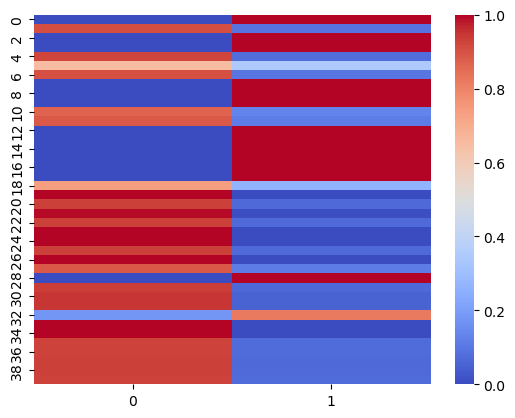

In [73]:
import seaborn as sns
probabilities = gmm.predict_proba(X)
sns.heatmap(probabilities, cmap='coolwarm', annot=False)

### Rest of the notebook was not included in the report as it contains experiments of different setups.

In [ ]:
front_videos = clustering_df[clustering_df['camera_type'] == 'front']
side_videos = clustering_df[clustering_df['camera_type'] == 'side']

In [35]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# Clustering only fron videos
data = front_videos

# Selecting the three variables for clustering
columns = ['avg_step_length', 'speed', 'asymmetry']
X = data[columns]

# Creating the GMM model with 2 clusters
gmm = GaussianMixture(n_components=2)

# Fitting the model to the data
gmm.fit(X)

# Getting the predicted cluster labels
predicted_labels = gmm.predict(X)

# Adding the predicted labels to the original data
data['cluster'] = predicted_labels

# Using Plotly Express for 3D scatter plot
fig = px.scatter_3d(data, x=columns[0], y=columns[1], z=columns[2], color='cluster', symbol='walking_type', width=1000, height=1000)
fig.show()

c:\Users\balda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\balda\AppData\Local\Temp\ipykernel_23068\1076516120.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame named 'data' with columns 'var1', 'var2', 'var3'
data = side_videos

# Selecting the three variables for clustering
columns = ['avg_step_length', 'speed', 'asymmetry']
X = data[columns]

# Creating the GMM model with 2 clusters
gmm = GaussianMixture(n_components=2)

# Fitting the model to the data
gmm.fit(X)

# Getting the predicted cluster labels
predicted_labels = gmm.predict(X)

# Adding the predicted labels to the original data
data['cluster'] = predicted_labels

# Visualizing the clusters (example for 2D plotting)


# Using Plotly Express for 3D scatter plot
fig = px.scatter_3d(data, x=columns[0], y=columns[1], z=columns[2], color='cluster', symbol='walking_type', width=1000, height=1000)
fig.show()


# plt.scatter(data['var1'], data['var2'], c=data['Cluster'], cmap='viridis', marker='o')  # Change columns for different combinations
# plt.xlabel('Variable 1')
# plt.ylabel('Variable 2')
# plt.title('GMM Clustering with 2 clusters')
# plt.colorbar(label='Cluster')
# plt.show()


c:\Users\balda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\balda\AppData\Local\Temp\ipykernel_23068\4091428107.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\balda\AppData\Local\Temp\ipykernel_23068\3897402999.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\balda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\balda\AppData\Local\Temp\ipykernel_23068\3897402999.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



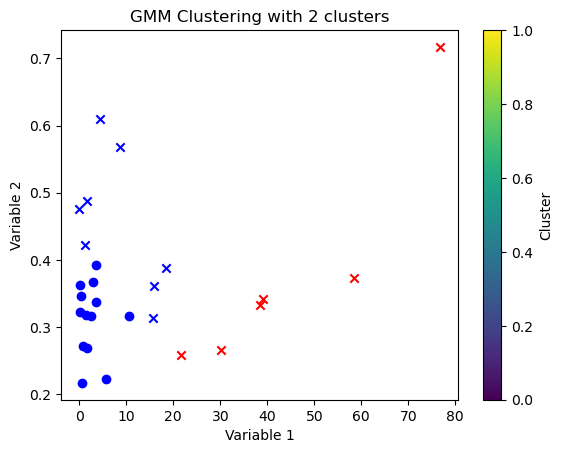

In [57]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame named 'data' with columns 'var1', 'var2', 'var3'
data = front_videos
data['binary_walking_type'] = data['walking_type'].apply(lambda x: 1 if x == 'abnormal' else 0)

# Selecting the three variables for clustering
columns = ['asymmetry', 'speed']
X = data[columns]

# Creating the GMM model with 2 clusters
gmm = GaussianMixture(n_components=2)

# Fitting the model to the data
gmm.fit(X)

# Getting the predicted cluster labels
predicted_labels = gmm.predict(X)

# Adding the predicted labels to the original data
data['cluster'] = predicted_labels

# Visualizing the clusters (example for 2D plotting)


# Using Plotly Express for 3D scatter plot
# fig = px.scatter_3d(data, x=columns[0], y=columns[1], z=columns[2], color='cluster', symbol='walking_type', width=1000, height=1000)
# fig.show()

m = data['walking_type'].values
mapping = {'normal':'o', 'abnormal':'x'}
clusters = data['cluster'].values
mapping_color = {0 : "red", 1 : "blue"}
for i in range(len(data[columns[0]])):
    plt.scatter(data[columns[0]].values[i], data[columns[1]].values[i], marker=mapping[m[i]], c=mapping_color[clusters[i]])

# plt.scatter(data[columns[0]], data[columns[1]], c=data['cluster'], cmap='viridis')  # Change columns for different combinations
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('GMM Clustering with 2 clusters')
plt.colorbar(label='Cluster')
plt.show()